In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Install mlxtend: conda install mlxtend --channel conda-forge
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the Ames Housing dataset
df0 = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t')

# Extract specific columns
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']
df = df0.loc[:, columns] # loc: select rows and columns according to their names. iloc uses integer indices.

# Convert the feature values of "Central Air" to integers
df['Central Air']=df['Central Air'].map({'N':0, 'Y':1})

# Drop the example with the missing value
df = df.dropna(axis=0) # axis=0: drop the row that contains the missing value

In [3]:
# Extract data

target_label = 'SalePrice'
# Extract all features
features = df.columns[df.columns!=target_label]

X = df[features].values
y = df[target_label].values

In [4]:
# Simple linear regression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [5]:
y_pred = lr.predict(X)

In [6]:
r2_score_lr = r2_score(y_true=y, y_pred=y_pred)
print(f"R2 score for the simple linear regression: {r2_score_lr:.2f}")

R2 score for the simple linear regression: 0.76


## Cross validation

In [7]:
# Create a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# Scores for cross validation
lr_cv = LinearRegression()
scores = cross_val_score(lr_cv, X_train, y_train, scoring='r2', cv=5)
print(scores)

[0.64373575 0.80432561 0.7961481  0.71623399 0.79700035]


In [9]:
# Calculate the scores manually
lr_kfold = LinearRegression()
kfold = KFold(n_splits=5).split(X_train)
for k, (train, test) in enumerate(kfold):
    lr_kfold.fit(X_train[train], y_train[train])
    score = lr_kfold.score(X_train[test],y_train[test])
    print(f'Fold:{k+1:02d}', f'R2 score={score}')

Fold:01 R2 score=0.643735746628678
Fold:02 R2 score=0.8043256123679665
Fold:03 R2 score=0.7961481005717881
Fold:04 R2 score=0.7162339872037147
Fold:05 R2 score=0.797000350586274


In [10]:
# Learning curve
lr_learning_curve = LinearRegression()
train_size_abs, train_scores, test_scores = learning_curve(
                            estimator=lr_learning_curve,
                            X=X_train, y=y_train, 
                            train_sizes=np.linspace(0.1, 1.0, 10),
                            cv=5,
                            n_jobs=1
                           )

In [11]:
# Calculate the mean and standard deviation for each round of training
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Text(0, 0.5, 'Score')

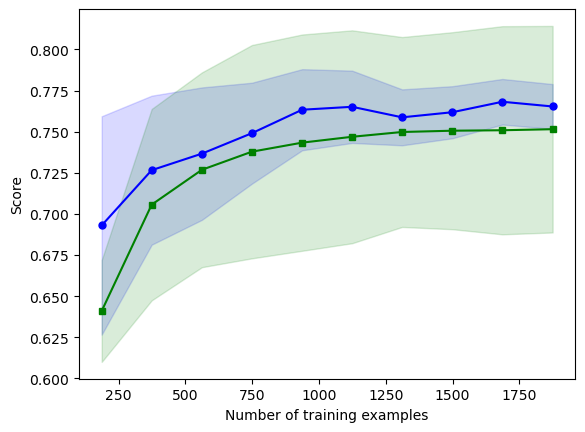

In [12]:
# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(train_size_abs, train_mean, color="blue", marker="o", markersize=5, label="Training score")
ax.fill_between(train_size_abs, train_mean+train_std, train_mean-train_std, alpha=0.15, color="blue")

ax.plot(train_size_abs, test_mean, color="green", marker="s", markersize=5, label="Validation score")
ax.fill_between(train_size_abs, test_mean+test_std, test_mean-test_std, alpha=0.15, color="green")

ax.set_xlabel("Number of training examples")
ax.set_ylabel("Score")

In [19]:
# Validation curve
rdg = Ridge()
param_range = np.logspace(-3, 5, 8)
train_scores, test_scores = validation_curve(estimator=rdg,
                                             X=X_train, y=y_train, 
                                             param_name="alpha",
                                             param_range=param_range,
                                             cv=10,
                                             scoring='r2'
                                            )

In [20]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.0, 1.0)

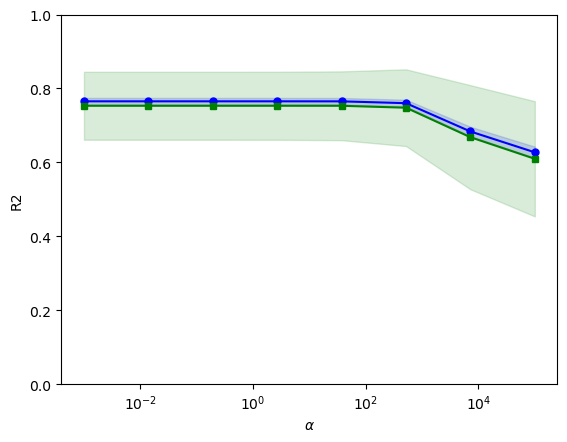

In [21]:
# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(param_range, train_mean, color="blue", marker="o", markersize=5, label="Training R2")
ax.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color="blue")


ax.plot(param_range, test_mean, color="green", marker="s", markersize=5, label="Validation R2")
ax.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color="green")

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("R2")

ax.set_xscale('log')

ax.set_ylim([0, 1])


In [23]:
# Grid search for the best hyperparameter alpha
rdg = Ridge()
param_range = np.logspace(-3, 5, 8)

param_grid = [
    {'alpha':param_range,
    },
]

# Initialize a grid search agent
gs = GridSearchCV(estimator=rdg,
                  param_grid=param_grid,
                  scoring='r2',
                  cv=10,
                  refit=True    
)

In [24]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-03, 1.38949549e-02, 1.93069773e-01, 2.68269580e+00,
       3.72759372e+01, 5.17947468e+02, 7.19685673e+03, 1.00000000e+05])}],
             scoring='r2')

In [25]:
gs.best_params_

{'alpha': 2.6826957952797246}

In [26]:
# Test the best selected model
rdg_best = gs.best_estimator_
rdg_best.fit(X_train, y_train)
print(f"Train R2: {rdg_best.score(X_train, y_train)}")
print(f"Test R2: {rdg_best.score(X_test, y_test)}")

Train R2: 0.764931839197533
Test R2: 0.7642564542622797
